# **Problem Statement:**

Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends



# **Dataset:**
CSV and Excel files containing data about the number of COVID-19 confirmed
deaths and recovered patients both around the world and in india


# **Guidelines:**
● Use pandas to accumulate data from multiple data files.

● Use plotly (visualization library) to create interactive visualizations.

● Use Facebook prophet library to make time series models.

● Visualize the prediction by combining these technologies.


In [48]:
## import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [49]:
##read and upload the dataset
df = pd.read_csv('/content/covid_19_clean_complete (4).csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [50]:
### check the dimention of the data
print(f"the shape of the data is{df.shape}")

the shape of the data is(49068, 10)


In [51]:
##check the description of the data will present the statistical part of the data
df.describe() ## presenting only the numeric columns



,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [52]:
###check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [53]:
### will rename the column which has two name
df.rename(columns={'Province/State':'State', 'Country/Region':'Country'}, inplace = True)

In [54]:
## check the columns
df.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [55]:
## check the null values
df.isnull().sum()

,0
State,34404
Country,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [56]:
## check the duplicates
df.duplicated().sum()

np.int64(0)

In [57]:
###check how many times a date is repeated
df['Date'].value_counts()


,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [58]:
##check the max date, the max will refer to the last date
df['Date'].max()

'2020-07-27'

In [59]:
##So, make the top date
top_date = df[df['Date'] == '2020-07-27']

In [60]:
## access the top dateb head 10
top_date.head(10)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa
48812,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-07-27,86,3,65,18,Americas
48813,NaN,Argentina,-38.41610,-63.616700,2020-07-27,167416,3059,72575,91782,Americas
48814,NaN,Armenia,40.06910,45.038200,2020-07-27,37390,711,26665,10014,Europe
48815,Australian Capital Territory,Australia,-35.47350,149.012400,2020-07-27,113,3,109,1,Western Pacific
48816,New South Wales,Australia,-33.86880,151.209300,2020-07-27,3699,49,2989,661,Western Pacific


In [61]:
#In the recent date i want to know how many cases are there in a country
top_date.groupby(['Country'])[['Confirmed',	'Deaths',	'Recovered', 'Active']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [62]:
###check the confirmed cases
confirmed_cases = df.groupby(['Date'])[['Confirmed']].sum().reset_index()
confirmed_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


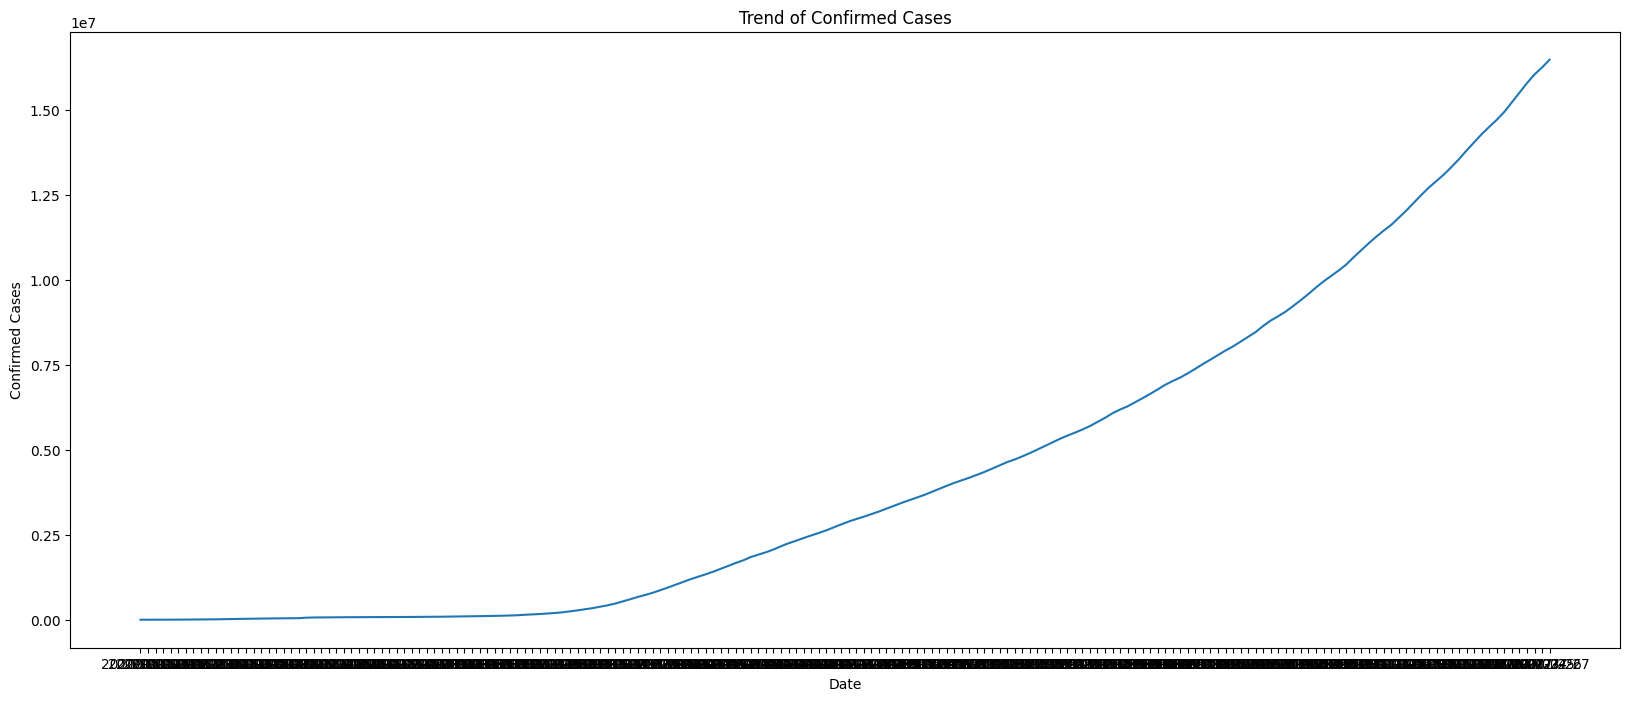

In [63]:
##Check the trend of the confirmed cases
plt.figure(figsize=(20,8))
sns.lineplot(data = confirmed_cases, x = "Date", y= "Confirmed")
plt.title("Trend of Confirmed Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

In [64]:
###check the Death_Cases
Death_Cases= df.groupby(['Date'])[['Deaths']].sum().reset_index()
Death_Cases

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


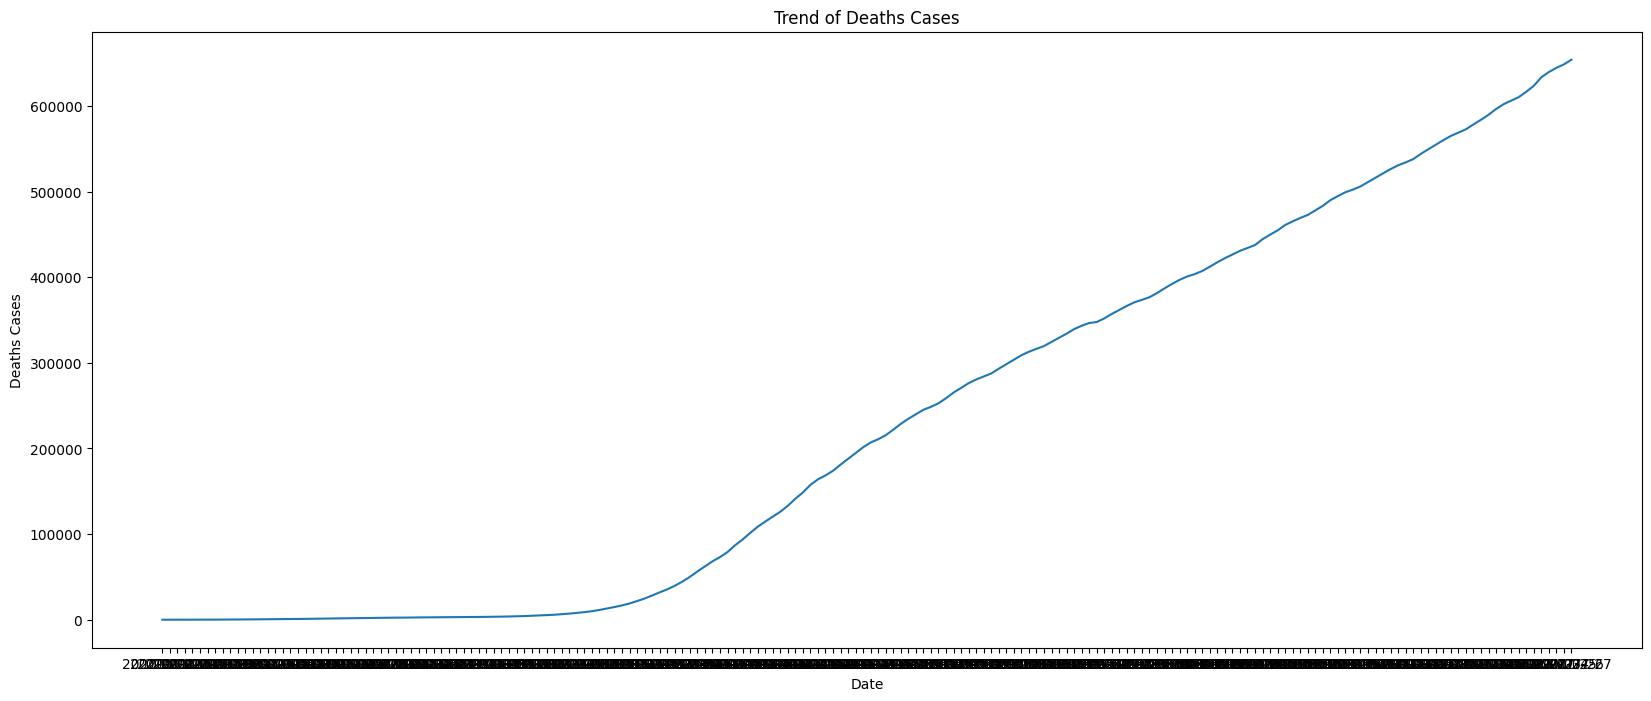

In [65]:
##Check the trend of the confirmed cases
plt.figure(figsize=(20,8))
sns.lineplot(data = Death_Cases, x = "Date", y= "Deaths")
plt.title("Trend of Deaths Cases")
plt.xlabel("Date")
plt.ylabel("Deaths Cases")
plt.show()

In [66]:
##check the recovered cases
Recovered_Cases= df.groupby(['Date'])[['Recovered']].sum().reset_index()
Recovered_Cases

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


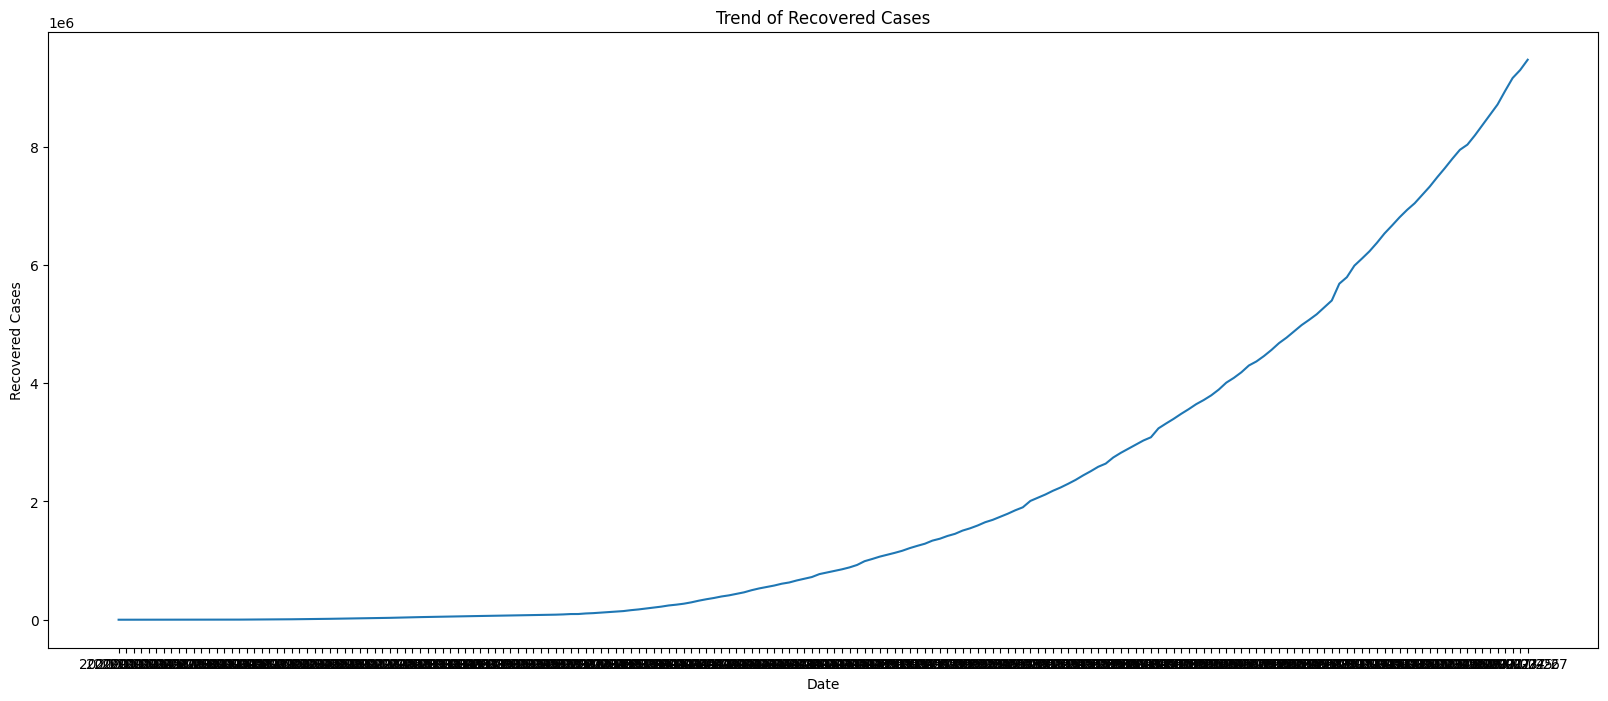

In [67]:
## check the trend of the Recovered_Cases
plt.figure(figsize=(20,8))
sns.lineplot(data = Recovered_Cases, x = "Date", y= "Recovered")
plt.title("Trend of Recovered Cases")
plt.xlabel("Date")
plt.ylabel("Recovered Cases")
plt.show()

In [68]:
## check the Active_Cases
Active_Cases= df.groupby(['Date'])[['Active']].sum().reset_index()
Active_Cases

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


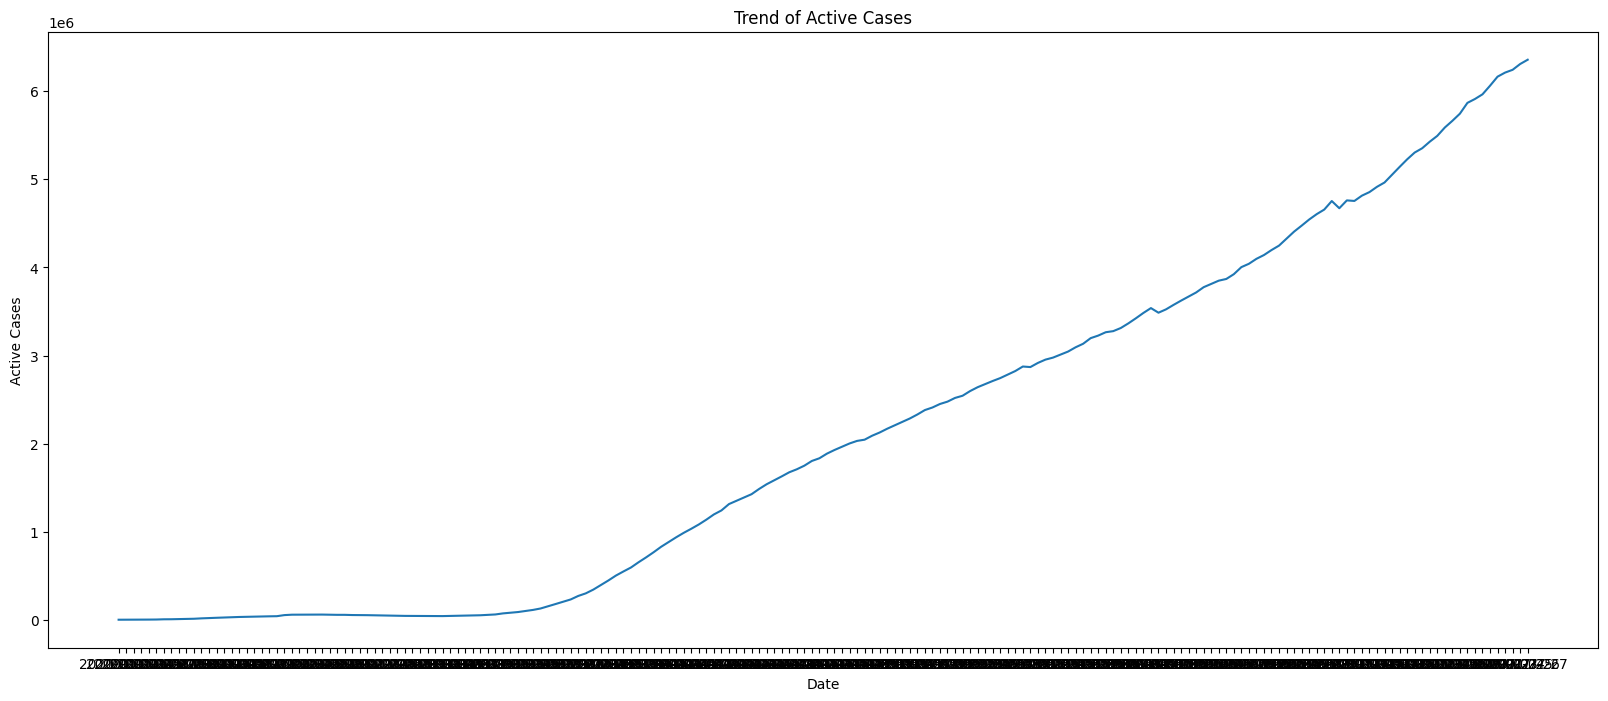

In [69]:
## Check the trend of the Recovered_cases
plt.figure(figsize=(20,8))
sns.lineplot(data = Active_Cases, x = "Date", y= "Active")
plt.title("Trend of Active Cases")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.show()

In [70]:
df

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


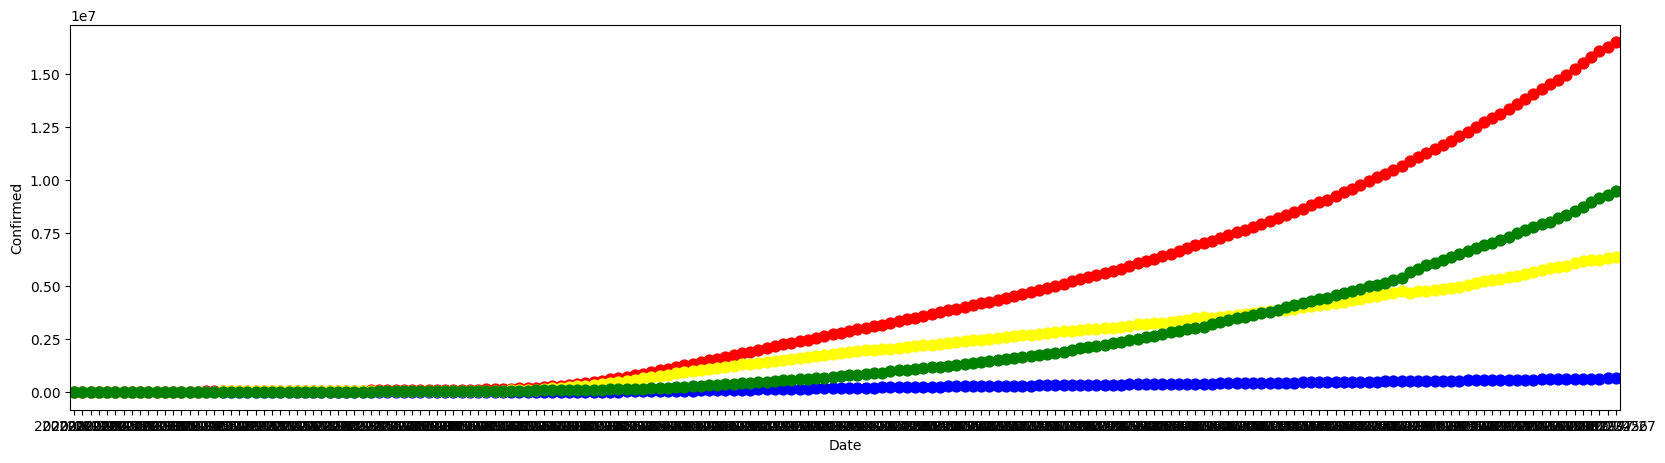

In [71]:
##check the trend of all the cases together
plt.figure(figsize = (20,5))
sns.pointplot(data = confirmed_cases,x= 'Date',y='Confirmed',color = 'Red')
sns.pointplot(data = Death_Cases,x= 'Date',y='Deaths',color = 'Blue')
sns.pointplot(data = Active_Cases,x= 'Date',y='Active',color = 'Yellow')
sns.pointplot(data = Recovered_Cases,x= 'Date',y='Recovered',color = 'Green')
plt.show()

In [72]:
##check all the cases except of the recovery in all the country
Total_Cases_Country = df.groupby(["Country"])[["Confirmed", "Deaths","Active"]].sum().reset_index()
Total_Cases_Country

,Country,Confirmed,Deaths,Active
0,Afghanistan,1936390,49098,1089052
1,Albania,196702,5708,72117
2,Algeria,1179755,77972,345886
3,Andorra,94404,5423,19907
4,Angola,22662,1078,15011
...,...,...,...,...
182,West Bank and Gaza,233461,1370,170967
183,Western Sahara,901,63,190
184,Yemen,67180,17707,25694
185,Zambia,129421,2643,43167


In [73]:
## check for the US
US = df[df["Country"] == "US"]

In [74]:
df

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [75]:
## check all the Cases in US
US_Cases = US.groupby(["Date"])[["Confirmed", "Deaths","Active"]].sum().reset_index()
US_Cases

,Date,Confirmed,Deaths,Active
0,2020-01-22,1,0,1
1,2020-01-23,1,0,1
2,2020-01-24,2,0,2
3,2020-01-25,2,0,2
4,2020-01-26,5,0,5
...,...,...,...,...
183,2020-07-23,4038816,144430,2661117
184,2020-07-24,4112531,145560,2705347
185,2020-07-25,4178970,146465,2753091
186,2020-07-26,4233923,146935,2789125


In [76]:
###check all the cases in China
China = df[df["Country"] == "China"]

In [77]:
China

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific


In [78]:
## check all the cases in China except of the recovery
China_Cases = China.groupby(["Date"])[["Confirmed", "Deaths","Active"]].sum().reset_index()
China_Cases

,Date,Confirmed,Deaths,Active
0,2020-01-22,548,17,503
1,2020-01-23,643,18,595
2,2020-01-24,920,26,858
3,2020-01-25,1406,42,1325
4,2020-01-26,2075,56,1970
...,...,...,...,...
183,2020-07-23,86045,4649,2695
184,2020-07-24,86202,4650,2807
185,2020-07-25,86381,4652,2916
186,2020-07-26,86570,4652,3056


In [79]:
## Check all the cases in the India
India = df[df["Country"] == "India"]

In [80]:
##check all the cases in China except of the recovery
India_Cases = India.groupby(["Date"])[["Confirmed", "Deaths","Active"]].sum().reset_index()
India_Cases

,Date,Confirmed,Deaths,Active
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
183,2020-07-23,1288108,30601,440298
184,2020-07-24,1337024,31358,456234
185,2020-07-25,1385635,32060,468002
186,2020-07-26,1435616,32771,485277


In [81]:
# MODEL BUILDING

# prophet is A timeseries forecasting tool that is developed by facebook

# particularly used for data that has stroing seasonal effects(like daily or weekly )

# y(t) = g(t)+s(t)+h(t)+e(t)

# y(t) = the value at that time---number of cases
# g(t) = trend function
# s(t) = seasonality function
# h(t) = holiday effects
# e(t) = error

# advantages

# directly handle missing data
# trend detection
# easy to add regarding holidays
# work well with daily and weekly data
# bussiness
# short term forecasting works well


# when to use prophet

# additive modeling -- trend +sesonality +holidays

In [ ]:
## intall prohphet
## !pip install -- upgrade prophet cmdstanpy    #-- just upgradng the prophet
## restart the session
## then comment the upgrade (!pip install -- upgrade prophet cmdstanpy -- )
# import prophet and create instance

# To fix the 'AttributeError: 'Prophet' object has no attribute 'stan_backend'' error,
# we need to ensure prophet and its dependencies are correctly installed.
# This often happens due to incompatibility or missing components.
# Let's try reinstalling prophet with cmdstanpy backend.
# You might need to restart the runtime after this installation.
# !pip install --upgrade prophet cmdstanpy


In [82]:
!pip install prophet

In [83]:
## Confirmed Cases
confirmed_cases = df.groupby(['Date'])[['Confirmed']].sum().reset_index()

In [84]:
confirmed_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [85]:
#the columns names should be ds and y and it is mandatory
confirmed_cases.columns = ['ds', 'y']

In [86]:
confirmed_cases

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [87]:
### import the prophet
from prophet import Prophet

In [88]:
##make the variable
model = Prophet()

In [89]:
## let's train the model
model.fit(confirmed_cases)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [95]:
## prediction
future = model.make_future_dataframe(periods = 7)
forecasted = model.predict(future)

In [96]:
forecasted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613288e+03,-1.315214e+05,7.607979e+04,-9.613288e+03,-9.613288e+03,-11063.558307,-11063.558307,-11063.558307,-11063.558307,-11063.558307,-11063.558307,0.0,0.0,0.0,-2.067685e+04
1,2020-01-23,-6.933409e+03,-1.173805e+05,9.670676e+04,-6.933409e+03,-6.933409e+03,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,0.0,0.0,0.0,-8.050953e+03
2,2020-01-24,-4.253530e+03,-1.021598e+05,1.118645e+05,-4.253530e+03,-4.253530e+03,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,0.0,0.0,0.0,5.827449e+03
3,2020-01-25,-1.573651e+03,-1.004791e+05,1.150251e+05,-1.573651e+03,-1.573651e+03,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106228e+03,-9.273905e+04,1.206038e+05,1.106228e+03,1.106228e+03,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.662527e+07,1.684385e+07,1.674052e+07,1.675163e+07,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,0.0,0.0,0.0,1.674392e+07
191,2020-07-31,1.694902e+07,1.684962e+07,1.706514e+07,1.693876e+07,1.696169e+07,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,0.0,0.0,0.0,1.695911e+07
192,2020-08-01,1.715301e+07,1.706953e+07,1.727650e+07,1.713557e+07,1.717442e+07,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,0.0,0.0,0.0,1.716677e+07
193,2020-08-02,1.735701e+07,1.725939e+07,1.747795e+07,1.733084e+07,1.738832e+07,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,0.0,0.0,0.0,1.736430e+07


In [92]:
# df : This col contains the date for which the predictions have been made. it stands for datestamp

# yhat : This is the predicted value for the given date in ds columns,it represents the models best estimate for the point in time

# yhat upper ---upper bound of the predicted value

# yhat lower --lower bound of the predicted


# y = actual number of covid cases

# yhat = predicted number of covid cases --- forecasting

In [99]:
forecasted [['yhat_lower','yhat','yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-1.315214e+05,-2.067685e+04,7.607979e+04
1,-1.173805e+05,-8.050953e+03,9.670676e+04
2,-1.021598e+05,5.827449e+03,1.118645e+05
3,-1.004791e+05,1.217668e+04,1.150251e+05
4,-9.273905e+04,8.405020e+03,1.206038e+05
...,...,...,...
190,1.662527e+07,1.674392e+07,1.684385e+07
191,1.684962e+07,1.695911e+07,1.706514e+07
192,1.706953e+07,1.716677e+07,1.727650e+07
193,1.725939e+07,1.736430e+07,1.747795e+07


Black points are the actual dat points
blue line is the predicted
and it is capturing perfectly

In [100]:
## let' install plotly
import plotly

In [101]:
import plotly.express as px

In [102]:
###cosidered all the cases in the world
world = df.groupby(['Country'])[['Confirmed','Active','Deaths','Recovered']].sum().reset_index()

In [103]:
### Creating the visual using the plotly
figure = px.choropleth(world,locations = 'Country',locationmode = 'country names',color = 'Active',hover_name = 'Country',range_color = [1,100000],color_continuous_scale= 'reds',title = 'world map for active cases')
figure.show()